### Descubrimientos Finales.

# Este archivo consta de descubrimientos realizados en base a los datos ya tratados sobre el abandono escolar.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga y Lectura de datos

archivo = "Fuente_Completa/AbandonoEscolar_COMPLETO.csv"

df = pd.read_csv(archivo, encoding='latin1')

print (df.head())

         entidad_federativa nivel_educativo  2015-2016  2016-2017  2017-2018  \
0  Estados Unidos Mexicanos        Primaria        0.7        1.1        0.5   
1  Estados Unidos Mexicanos      Secundaria        4.4        5.3        4.6   
2  Estados Unidos Mexicanos  Media superior       15.5       15.2       14.5   
3  Estados Unidos Mexicanos        Superior        7.0        7.2        8.4   
4            Aguascalientes        Primaria        0.2        0.6        0.0   

   2018-2019  2019-2020  2020-2021  2021-2022  2022-2023  2023-2024  
0        0.7        0.4        0.5        0.2        0.1        0.1  
1        4.8        2.7        2.9        3.9        3.2        2.9  
2       13.0       10.3       11.6       10.2       11.2       10.8  
3        7.9        8.4        8.8        8.1        7.2        5.7  
4        0.2        0.3        0.7        0.4        0.0        0.0  


# 1. Evolución nacional del abandono por nivel educativo

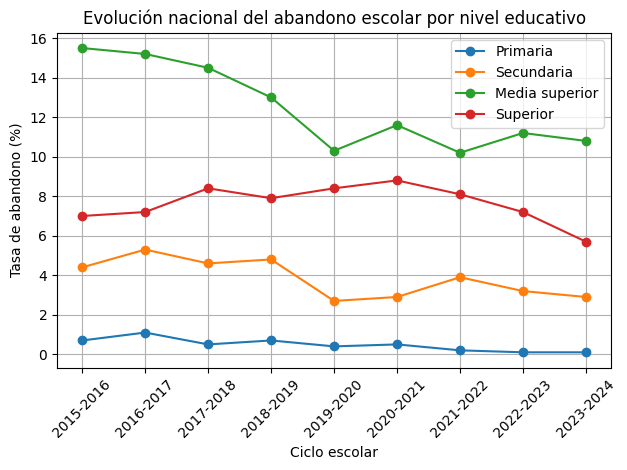

In [15]:
niveles_nacionales = df[df["entidad_federativa"] == "Estados Unidos Mexicanos"]

for nivel in niveles_nacionales["nivel_educativo"].unique():
    fila = niveles_nacionales[niveles_nacionales["nivel_educativo"] == nivel]
    fila.iloc[0, 2:].plot(label=nivel, marker='o')

plt.title("Evolución nacional del abandono escolar por nivel educativo")
plt.xlabel("Ciclo escolar")
plt.ylabel("Tasa de abandono (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# 2. ¿Qué nivel educativo tiene mayor abandono en promedio nacional?

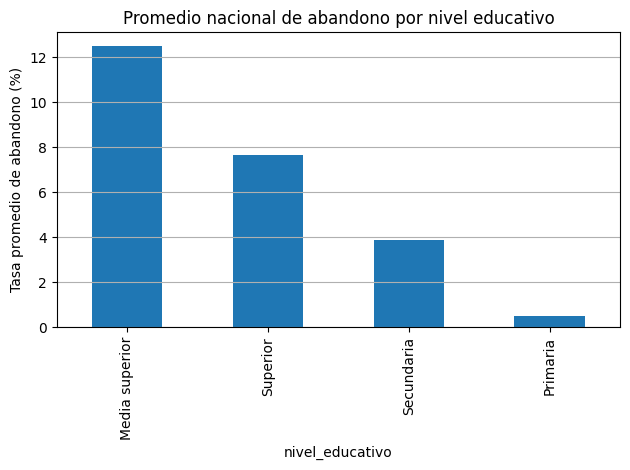

In [16]:
promedios = niveles_nacionales.set_index("nivel_educativo").iloc[:, 1:].mean(axis=1).sort_values(ascending=False)
promedios.plot(kind="bar", title="Promedio nacional de abandono por nivel educativo")
plt.ylabel("Tasa promedio de abandono (%)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# 3. Entidad con mayor abandono en 2020–2021 (media superior)

In [17]:
media_sup = df[df["nivel_educativo"] == "Media superior"]
top_2021 = media_sup[["entidad_federativa", "2020-2021"]].sort_values("2020-2021", ascending=False).head(1)
print("Entidad con mayor abandono en 2020–2021 (Media superior):")
print(top_2021)


Entidad con mayor abandono en 2020–2021 (Media superior):
   entidad_federativa  2020-2021
34          Chihuahua       16.5


# 4. Entidades que más redujeron el abandono (Media superior, 2015–2024)

In [18]:
media_sup = df[df["nivel_educativo"] == "Media superior"].copy()
media_sup["mejora"] = media_sup["2015-2016"] - media_sup["2023-2024"]
mejores = media_sup.sort_values("mejora", ascending=False)[["entidad_federativa", "mejora"]].head(5)
print("Top 5 entidades que más redujeron el abandono:")
print(mejores)

Top 5 entidades que más redujeron el abandono:
    entidad_federativa  mejora
38    Ciudad de México    11.6
70             Morelos     9.3
10     Baja California     7.0
42             Durango     6.9
114         Tamaulipas     6.7


# 5. Entidades que más empeoraron (Secundaria, 2015–2024)

In [19]:
secundaria = df[df["nivel_educativo"] == "Secundaria"].copy()
secundaria["empeora"] = secundaria["2023-2024"] - secundaria["2015-2016"]
peores = secundaria.sort_values("empeora", ascending=False)[["entidad_federativa", "empeora"]].head(5)
print("Top 5 entidades que aumentaron más el abandono:")
print(peores)

Top 5 entidades que aumentaron más el abandono:
   entidad_federativa  empeora
37   Ciudad de México      1.9
93       Quintana Roo      1.9
25             Colima      1.0
69            Morelos     -0.1
61             México     -0.3


# 6. Ciclo con mayor abandono nacional en media superior

In [20]:
media_nacional = df[(df["entidad_federativa"] == "Estados Unidos Mexicanos") & 
                    (df["nivel_educativo"] == "Media superior")]
max_anio = media_nacional.iloc[0, 2:].idxmax()
print(f"El ciclo con mayor abandono nacional en media superior fue: {max_anio}")


El ciclo con mayor abandono nacional en media superior fue: 2015-2016


# 7. Variabilidad del abandono por entidad (media superior)

In [21]:
media_sup = df[df["nivel_educativo"] == "Media superior"]
media_sup["std"] = media_sup.iloc[:, 2:11].std(axis=1)
top_var = media_sup[["entidad_federativa", "std"]].sort_values("std", ascending=False).head(5)
print("Top 5 entidades con mayor variabilidad en abandono (media superior):")
print(top_var)


Top 5 entidades con mayor variabilidad en abandono (media superior):
    entidad_federativa       std
58             Jalisco  7.007853
38    Ciudad de México  4.415534
74             Nayarit  3.875564
70             Morelos  3.239770
114         Tamaulipas  2.938301


C:\Users\regip\AppData\Local\Temp\ipykernel_17040\3274944302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_sup["std"] = media_sup.iloc[:, 2:11].std(axis=1)


# 8. Comparación del abandono por nivel educativo media-superior entre regiones.

In [22]:
regiones = {
    "Norte": [
        "Baja California", "Baja California Sur", "Chihuahua", "Coahuila de Zaragoza", 
        "Durango", "Nuevo León", "Sinaloa", "Sonora", "Tamaulipas"
    ],
    "Centro": [
        "Aguascalientes", "Ciudad de México", "Colima", "Guanajuato", "Hidalgo", 
        "Jalisco", "México", "Michoacán de Ocampo", "Morelos", "Nayarit", 
        "Querétaro", "San Luis Potosí", "Tlaxcala", "Zacatecas"
    ],
    "Sur": [
        "Campeche", "Chiapas", "Guerrero", "Oaxaca", "Puebla", 
        "Quintana Roo", "Tabasco", "Veracruz de Ignacio de la Llave", "Yucatán"
    ]
}

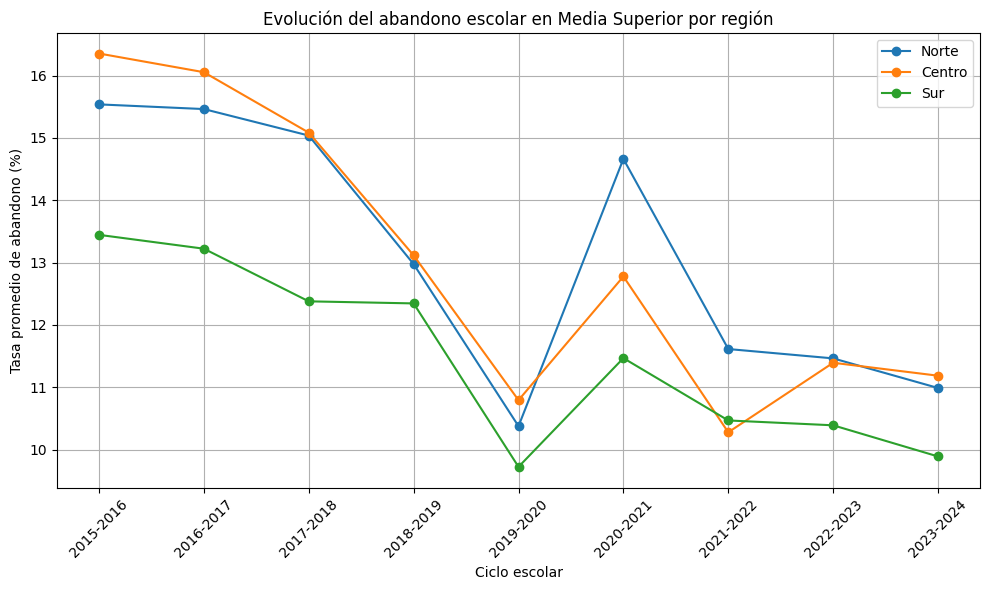

In [24]:
plt.figure(figsize=(10, 6))

for region, estados in regiones.items():
    df_region = df[(df["entidad_federativa"].isin(estados)) & 
                   (df["nivel_educativo"] == "Media superior")]
    promedio_ciclos = df_region.iloc[:, 2:].mean()
    plt.plot(promedio_ciclos.index, promedio_ciclos.values, marker="o", label=region)

plt.title("Evolución del abandono escolar en Media Superior por región")
plt.xlabel("Ciclo escolar")
plt.ylabel("Tasa promedio de abandono (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
